In [1]:
from random import random, expovariate
from matplotlib import pyplot as plt
from statistics import mean
from scipy.stats import bernoulli

In [2]:
n = 6  # número de guichês
lamb = 3  # taxa de entrada de clientes
mi = .5  # taxa de atendimentos a clientes por cada guichê
t = 50  # intervalo de tempo total sobre o qual se deseja calcular as médias de aceitações e rejeições
rodadas = 20000  # número de iterações da simulação

In [3]:
class Cliente:
    
    tempo_atendimento = -1
    
    def __init__(self, momento_chegada):
        self.momento_chegada = momento_chegada
    
    def vai_desistir(self, tam_fila):
        if (tam_fila / (tam_fila + n)) > random():
            return True
        return False

In [11]:
def rodada():
    gt = [0] * n  # instante em que cada guichê estará disponível
    k = 0  # contador de clientes que entraram na fila até o momento
    ct = []  # vetor de tamanho variável em que ctcheg[k] > 0 denota o instante em que o k-ésimo cliente chegou
    x = 0  # contador de clientes já atendidos
    y = 0  # contador de clientes que foram embora sem entrar na fila;
    r = 0  # comprimento atual da fila
    tm = 0  # tempo máximo de permanência dentre todos os clientes atendidos até o momento
  
    # encontre o momento de chegada do primeiro cliente
    momento = expovariate(lamb)  # instante atual
    while momento < t:
        # Contabilize a chegada deste cliente 
        k += 1
        ct.append(momento)
        
        # Processe quais clientes foram atendidos deste a última iteração do loop principal
        while min(gt) < momento and x < k:
            x += 1
            j = gt.index(min(gt))
            a = expovariate(mi)
            gt[j] = max(gt[j], ct[x-1]) + a
            tm = max(tm, (gt[j] - ct[x-1]))
        
        r = max(0, ((k - 1) - x))  # não considere o último cliente
        
        # Decida se o cliente atual vai ficar na fila
        pr = r/(r + n)
        if(bernoulli.rvs(pr)) == 1:
            k = k - 1
            y = y + 1
        
        r = k - x
        w = y/(x + y + r)
        
        # Encontre o momento de chegada do próximo cliente
        momento += expovariate(lamb)
        
    return {
        'x': x,
        'y': y,
        'r': r,
        'w': w,
        'tm':tm
    }

In [12]:
iteracoes = []
for i in range(rodadas):
    iteracoes.append(rodada())

# Qual o número esperado de clientes atendidos até o instante T?

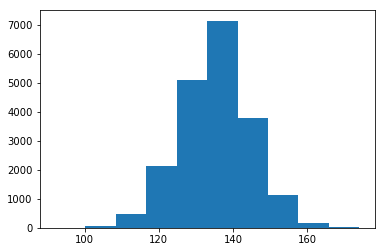

In [14]:
plt.hist([i['x'] for i in iteracoes])
plt.show()

# Qual o número esperado de clientes que foram embora até o instante T?

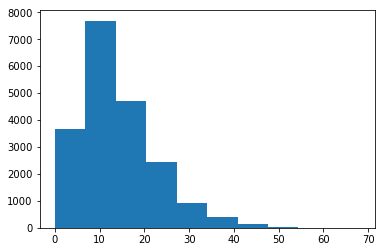

In [15]:
plt.hist([i['y'] for i in iteracoes])
plt.show()

# Qual a proporção de clientes que foram embora?

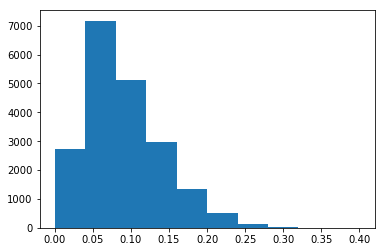

In [16]:
plt.hist([i['w'] for i in iteracoes])
plt.show()

# Qual o comprimento esperado da fila no instante T?

In [ ]:
# mean([len(i['r']) for i in iteracoes])

## Comprimento final da fila em cada iteração

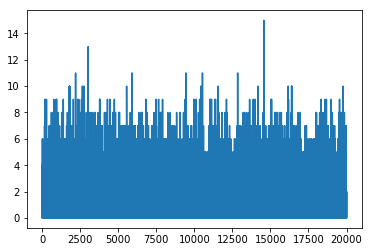

In [17]:
plt.plot([i['r'] for i in iteracoes])
plt.show()

# Considerando apenas os clientes que foram efetivamente atendidos, qual o valor esperado do tempo máximo de permanência dos clientes desde sua chegada até o término de seu atendimento?

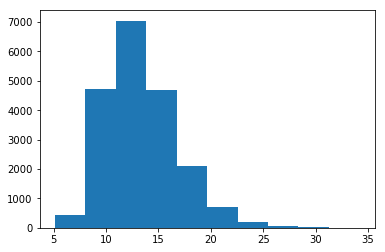

In [18]:
plt.hist([i['tm'] for i in iteracoes])
plt.show()